# 가설
- 모델 설계에 관한 가설
  - 이전에 수행한 Exploration2에서 모델의 capacity를 향상시키면 별다른 데이터 전처리가 없더라도 모델이 데이터 사이의 상관관계를 찾아 예측 성능이 향상될 것이라는 가설로 학습을 진행하였다. 하지만 학습을 수행한 결과 가설과는 다르게 모델을 깊게 쌓을수록 loss가 증가하는 결과가 나타났다.
  - 성능 악화의 원인을 생각해본 결과 다음과 같은 착각을 하고 있었다는 것을 깨닫게 되었다.
  - 이미지 분류 모델에서 모델을 깊게 쌓으면 레이어가 깊어질수록 더욱 고차원의 특징을 찾아낸다고 알고 있었다.
  - 하지만 이것이 가능한 이유는 모델의 입력 데이터가 시각 표현의 가장 저차원 데이터인 픽셀 데이터이기 때문에 가능한 것이었으며
  - Regression 문제에 사용하는 입력 데이터들은 이미 고차원 특징들이기 때문에 모델을 이용하여 고차원 데이터 사이의 상관관계를 찾아내기는 어렵다. 따라서 상관관계를 찾아내기 위해서는 저차원의 특징들로 분해한 후 다시 고차원 특징을 찾는 과정이 필요하다.
  - 이번 Exploaration4에서는 모델의 성능에 의존하기보다 데이터셋을 상관관계를 찾기 쉬우며 의미있는 형태의 고차원 특징으로 만들어주는 전처리 수행 후 학습을 진행하겠다.
- 부동산 관련 지식
  - 미국의 부동산 가격을 분석하기에 앞서 한국에서는 어떤 요인들과 공식이 부동산 가격에 영향을 미치는지 알아보았다.  
  - 아래의 그림들을 보아 부동산 가격은 지역적 특성과 지역적 특성 외적 요인으로 구분하면 좋을 것 같다.
  - 자세한 내용은 아래의 문제 정의에서 더 기술해보겠다.
<img src='https://drive.google.com/uc?export=download&id=16ZHkbcU4rbIFEyR6ywtoToRXild84iaz' width="" height ="" /><br>
<img src='https://drive.google.com/uc?export=download&id=16d_HW59ycKXlua7W0Fxun5I-AhBuRjTc' width="" height ="" /><br>


# 문제 정의
- 문제의 종류 
  - 부동산 가격을 예측하는 Linear Regression 문제
- 데이터셋
  - 미국 시애틀의 부동산 거래 데이터셋
  - 미국의 부동산 시장과 한국의 부동산 시장이 같은 이론을 따르는지 알 수 없으나 일단 분석 진행을 위해 같은 이론으로 돌아간다고 가정함.
  - 데이터 수집 과정에 대한 설명이 없음. 따라서 데이터셋이 실제 미국 부동산 거래를 통계적으로 잘 반영하고 있는지 알 수 없음. 하지만 데이터 수집과정에서 편향이 없는 데이터라고 가정함.
  - 입력 데이터로부터 3가지 종류의 특징 데이터를 생성하겠음.
  - 위치적 요인 : 교통, 편의시설, 직장, 교육, 문화, 의료, 인구밀도 등에 의해 부동산 가격이 결정된다고 가정함. lat, long, zipcode, waterfront 등을 위치 분석에 사용할 수 있음.
  - 부동산의 품질 : bedrooms, bathrooms, sqft_living, sqft_lot, floors, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated 등 말 그대로 부동산의 품질에 관여하는 변수들을 특징 추출에 사용함.
  - 경제 및 정책적 요인 : 부동산 심리, 환율, 유가, 정부 공급 및 규제 정책 등등 여러가지가 있겠으나 입력데이터에서 사용 가능한 변수는 date 밖에 없음.
- 입력 데이터
  - ID : 집을 구분하는 번호(사용X)
  - date : 집을 구매한 날짜
  - price : 타겟 변수인 집의 가격
  - bedrooms : 침실의 수
  - bathrooms : 침실당 화장실 개수
  - sqft_living : 주거 공간의 평방 피트
  - sqft_lot : 부지의 평방 피트
  - floors : 집의 층 수
  - waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
  - view : 집이 얼마나 좋아 보이는지의 정도
  - condition : 집의 전반적인 상태
  - grade : King County grading 시스템 기준으로 매긴 집의 등급
  - sqft_above : 지하실을 제외한 평방 피트
  - sqft_basement : 지하실의 평방 피트
  - yr_built : 집을 지은 년도
  - yr_renovated : 집을 재건축한 년도
  - zipcode : 우편번호
  - lat : 위도
  - long : 경도
  - sqft_living15 : 2015년 기준 주거 공간의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)
  - sqft_lot15 : 2015년 기준 부지의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)
- 출력 데이터
  - 예상 부동산 가격

### Colab의 패키지 버전을 최신 버전으로 업그레이드

In [ ]:
!pip install --upgrade xgboost
!pip install --upgrade lightgbm
!pip install --upgrade missingno

     |████████████████████████████████| 192.9 MB 64 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
     |████████████████████████████████| 2.0 MB 8.8 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


### 구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/4강'

2019-ml-month-2nd-baseline.ipynb  data		    project4.ipynb
baseline_ex1.ipynb		  image
baseline_ex2_tuned.ipynb	  project4_2.ipynb


### 모듈 로드

In [4]:
import xgboost as xgb
import lightgbm as lgb
import missingno as msno

print(xgb.__version__)
print(lgb.__version__)
print(msno.__version__)

0.90
2.2.3
0.5.1


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score

### 데이터 로드

In [7]:
# 데이터셋 경로
base_dir = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/4강'
train_data_path = os.path.join(base_dir, "data/train.csv")
test_data_path = os.path.join(base_dir, "data/test.csv")
# print(train_data_path)
# print(test_data_path)

# 캐글 제출용 샘플 파일 주소
sample_submission_path = os.path.join(base_dir, "data/sample_submission.csv")
# print(sample_submission_path)

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
print('train data dim : {}'.format(train.shape))
print('test data dim : {}'.format(test.shape))

train data dim : (15035, 21)
test data dim : (6468, 20)


### 위치적 요인 분석

In [8]:
print("위도 최소값 : {0} / 최대값 : {1}".format(train.lat.min(), train.lat.max()))
print("경도 최소값 : {0} / 최대값 : {1}".format(train.long.min(), train.long.max()))

위도 최소값 : 47.1559 / 최대값 : 47.7776
경도 최소값 : -122.519 / 최대값 : -121.315


<img src='https://drive.google.com/uc?export=download&id=16gEPmTgkUOS-sJLAP0f7P0yCutenO0ZS' width="" height ="" /><br>

- 학습 데이터셋의 위도와 경도의 범위의 지도 데이터를 불러왔다.
- 이번 학습 데이터셋의 부동산 거래는 그림의 내부에서 발생한다.
- 교통이나 편의시설 등의 지리적 배치를 이미지 분석 기법이나 수치 표현으로 나타낼 수 있다면 좋겠지만 이번에 활용할 수 있는 내용은 제한적이다.
- 따라서 지리적 요인은 두가지 내용을 활용하겠다.
  - 

In [10]:
print(len(train.lat.unique()))
print(len(train.long.unique()))

4692
716


In [ ]:
# 좌표값으로 그래프를 그리고 가격을 표시해보자
# 위도의 경우 최소값을 -1에 최대값을 1에 매칭시키자
# 평균을 0으로 위치시키고 변동 범위를 -1 ~ 1로 설정
lat_mid = (data.lat.min() + data.lat.max()) / 2
lat_range = data.lat.max() - data.lat.min()
lat_scaled = (data.lat - lat_mid) * 2 / lat_range
print(lat_scaled.min())
print(lat_scaled.max())

-1.0000000000000113
0.9999999999999886


In [ ]:
# 좌표값으로 그래프를 그리고 가격을 표시해보자
# 경도의 경우 최소값을 -1에 최대값을 1에 매칭시키자
# 평균을 0으로 위치시키고 변동 범위를 -1 ~ 1로 설정
long_mid = (data.long.min() + data.long.max()) / 2
long_range = data.long.max() - data.long.min()
long_scaled = (data.long - long_mid) * 2 / long_range
print(long_scaled.min())
print(long_scaled.max())

-1.0
1.0


In [ ]:
# 0.0001 단위로 양자화 하기

In [ ]:
# 데이터의 범위는 -1e4 ~ 1e4, 데이터는 정수형으로 나타낸다.
coordx_arr = list(range(-10, 11, 1))
coordy_arr = list(range(-10, 11, 1))

In [ ]:
coord = np.zeros((20001, 20001), dtype=np.int64)

In [ ]:
coord_arr = pd.DataFrame(data=coord)

In [ ]:
# 좌표 생성은 끝났고 이제 해당 좌표에 값을 어떻게 집어넣을 것인가?

In [ ]:
coord_arr.tail(100)

,0,1,2,3,4,5,6,7,8,9,...,19991,19992,19993,19994,19995,19996,19997,19998,19999,20000
19901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


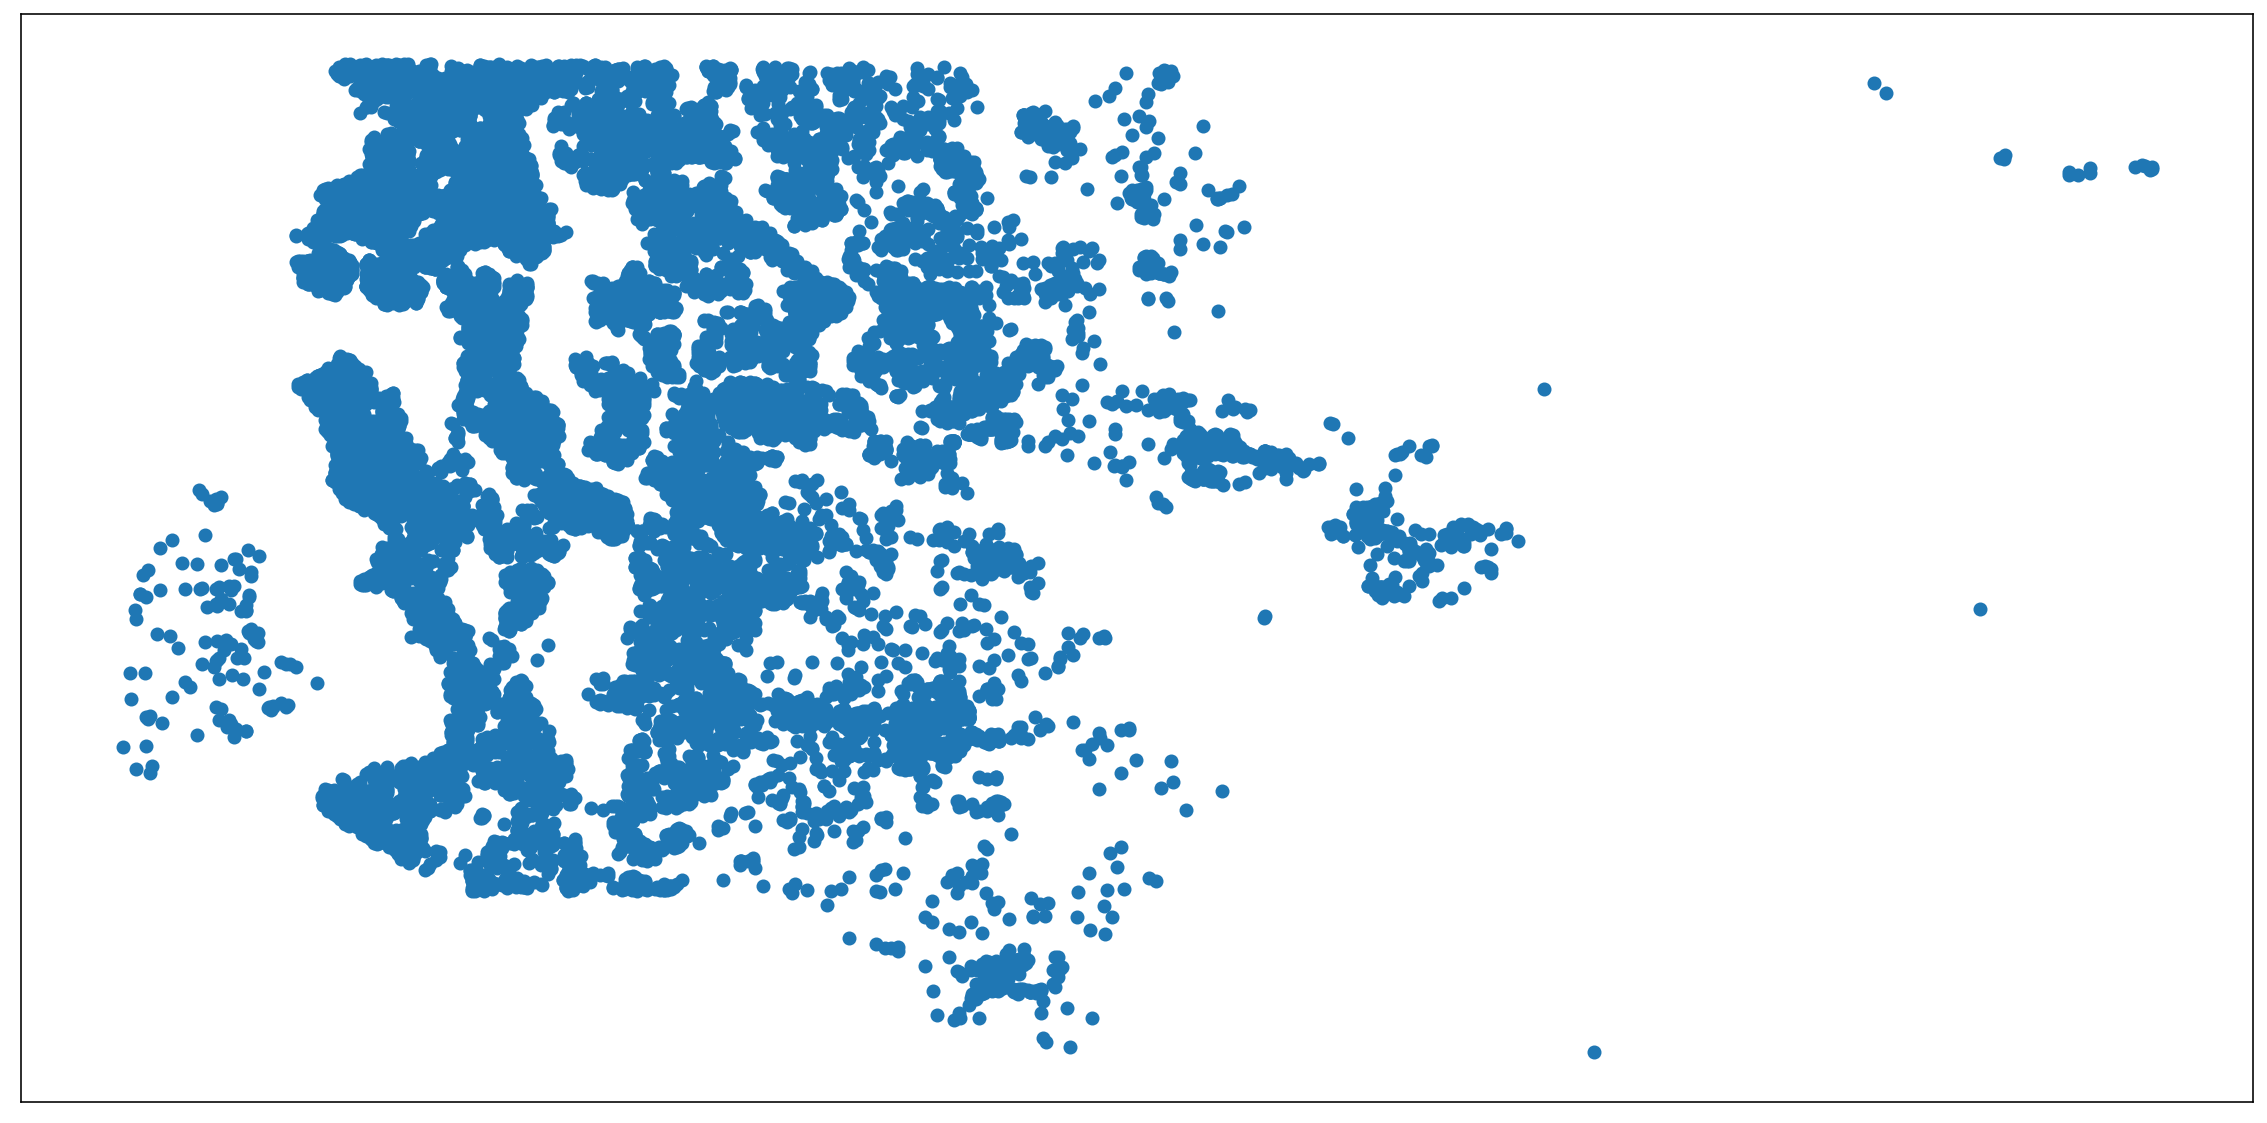

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.scatter(data.long, data.lat)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()